In [1]:
import numpy as np
import time
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import gzip

df = pd.read_table("SNV/MANIFEST.txt")
fileslist = []
header = []
for file_name in df[0:33]["filename"]:
    fileslist.append(file_name)
with gzip.open("SNV/"+fileslist[0],"rb") as f:
    print(f)
    i = 0
    while i <=4:
        header.append(f.readline())
        i += 1
    mf = pd.read_csv(f, delimiter = "\t")
    table = mf[0:]

<gzip _io.BufferedReader name='SNV/02747363-f04a-4ba6-a079-fe4f87853788/TCGA.UCS.mutect.02747363-f04a-4ba6-a079-fe4f87853788.DR-10.0.somatic.maf.gz' 0x22832854730>


In [2]:
Hugo_Symbol = table.loc[:,["Hugo_Symbol"]]
Y = table.loc[:,["Entrez_Gene_Id"]].values #independent variables
X = table.drop(["Hugo_Symbol","Entrez_Gene_Id"], axis = 1) #dependent variables

In [3]:
m = X.isna().sum().tolist()
m.sort(reverse =True)
print(m)

[10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10439, 10416, 10364, 10349, 10347, 10224, 10007, 9970, 9970, 9970, 9970, 9970, 9908, 9848, 9848, 9583, 8701, 8672, 8587, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8040, 7821, 7821, 7821, 4855, 4461, 3906, 2533, 2186, 1447, 1446, 1446, 1315, 1314, 1077, 942, 689, 626, 621, 621, 515, 202, 202, 202, 85, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10449 entries, 0 to 10448
Columns: 118 entries, Center to GDC_Validation_Status
dtypes: bool(1), float64(39), int64(9), object(69)
memory usage: 9.3+ MB


In [5]:
#Remove columns with all row values NaN
X.dropna(axis=1,how="all", inplace = True)
m = X.isna().sum().tolist()
m.sort(reverse =True)
print(m)

[10439, 10416, 10364, 10349, 10347, 10224, 10007, 9970, 9970, 9970, 9970, 9970, 9908, 9848, 9848, 9583, 8701, 8672, 8587, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8040, 7821, 7821, 7821, 4855, 4461, 3906, 2533, 2186, 1447, 1446, 1446, 1315, 1314, 1077, 942, 689, 626, 621, 621, 515, 202, 202, 202, 85, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
length = len(Y)
thresh = length*0.70
#m = X[X.columns[X.dtypes == float]]
X = X.dropna(axis=1,thresh=int(thresh))
#X = X.drop(X.columns[X.dtypes == float], axis=1)
#X = pd.concat([X,m], axis=1)

In [7]:
p = X.isna().sum().tolist()
p.sort(reverse =True)
print(p)

[2533, 2186, 1447, 1446, 1446, 1315, 1314, 1077, 942, 689, 626, 621, 621, 515, 202, 202, 202, 85, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
#fill nan values with most common in columns of type obj 
n = X.fillna(value="Unknown")
m = X.fillna(X.mode().iloc[0])
n.values

array([['BI', 'GRCh38', 'chr1', ...,
        '14213209-2217-4812-9a19-d9b2b6718467', True, 'Valid'],
       ['BI', 'GRCh38', 'chr1', ...,
        '14213209-2217-4812-9a19-d9b2b6718467', True, 'Valid'],
       ['BI', 'GRCh38', 'chr1', ...,
        '14213209-2217-4812-9a19-d9b2b6718467', True, 'Unknown'],
       ...,
       ['BI', 'GRCh38', 'chrX', ...,
        '200f77a5-803c-4891-980b-5c3b08c91254', True, 'Unknown'],
       ['BI', 'GRCh38', 'chrX', ...,
        '200f77a5-803c-4891-980b-5c3b08c91254', True, 'Unknown'],
       ['BI', 'GRCh38', 'chrX', ...,
        '200f77a5-803c-4891-980b-5c3b08c91254', True, 'Unknown']],
      dtype=object)

In [9]:
#Handling categorical values
def handle_categ_values(X):
    labelencoder_x = LabelEncoder()
    #m = X.columns#[X.dtypes == object]
    #for n in m:
    #    X[n] = labelencoder_x.fit_transform(X[n].astype(str))
    m = X.columns#[X.dtypes == bool]
    for n in m:
        X[n] = labelencoder_x.fit_transform(X[n].astype(str))
   
    return X

In [10]:
m=handle_categ_values(m)
n=handle_categ_values(n)
n.values

array([[ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  0],
       ...,
       [ 0,  0, 22, ...,  5,  1,  0],
       [ 0,  0, 22, ...,  5,  1,  0],
       [ 0,  0, 22, ...,  5,  1,  0]])

In [11]:
labelencoder_y= LabelEncoder()  
Y = labelencoder_y.fit_transform(Y)
Y

C:\Users\anjel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1695,  344, 6058, ..., 6697, 2491, 5458], dtype=int64)

In [12]:
st_x= StandardScaler()
m = st_x.fit_transform(m.values)
n= st_x.fit_transform(n.values)
n

array([[ 0.        ,  0.        , -1.48991653, ..., -2.01330818,
         0.28205261,  1.72511663],
       [ 0.        ,  0.        , -1.48991653, ..., -2.01330818,
         0.28205261,  1.72511663],
       [ 0.        ,  0.        , -1.48991653, ..., -2.01330818,
         0.28205261, -0.57967095],
       ...,
       [ 0.        ,  0.        ,  1.5710622 , ..., -1.70377241,
         0.28205261, -0.57967095],
       [ 0.        ,  0.        ,  1.5710622 , ..., -1.70377241,
         0.28205261, -0.57967095],
       [ 0.        ,  0.        ,  1.5710622 , ..., -1.70377241,
         0.28205261, -0.57967095]])

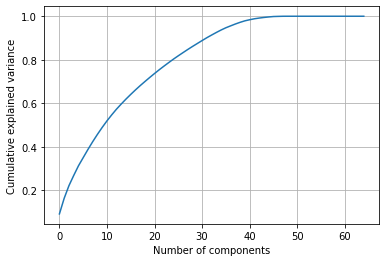

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


%matplotlib inline
pca = PCA().fit(m)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

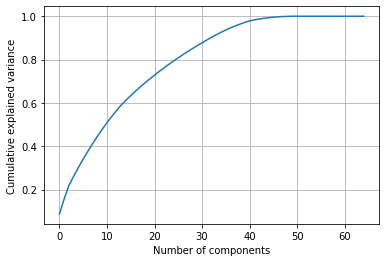

In [16]:

%matplotlib inline
pca = PCA().fit(n)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [19]:
#def PCA_algorithm(X):
    
p = PCA(n_components=10)

X_pca = p.fit_transform(n)

PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
    
target = pd.Series(table["Entrez_Gene_Id"], name="Gene_ID")
    
PCA_df = pd.concat([PCA_df, target], axis = 1)

ValueError: Shape of passed values is (10449, 10), indices imply (10449, 2)

In [20]:
# Calculate the variance explained by priciple components
print("Variance of each component:", p.explained_variance_ratio_)
print("\n Total Variance Explained:", 
      round(sum(list(p.explained_variance_ratio_))*100, 2))

Variance of each component: [0.08741085 0.06947246 0.06163746 0.04307367 0.04069536 0.0383698
 0.03634744 0.03550512 0.0335038  0.03212672]

 Total Variance Explained: 47.81


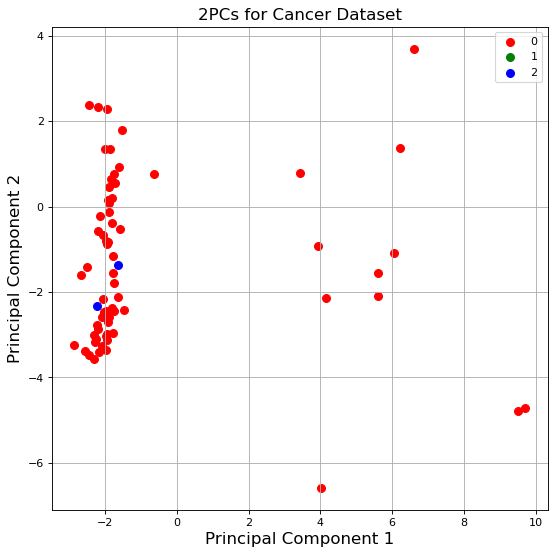

In [18]:
pca = PCA_df
%matplotlib inline
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [0, 1, 2]
colors = ['r', 'g', 'b']

for clas, color in zip(classes, colors):
    plt.scatter(pca.loc[table["Entrez_Gene_Id"] == clas, 'PC1'], 
                pca.loc[table["Entrez_Gene_Id"] == clas, 'PC2'], 
                c = color, s=50)
    
#for clas, color in zip(classes, colors):
 #   indicesToKeep = table["Entrez_Gene_Id"] == clas
  #  plt.scatter(pca.loc[indicesToKeep, "PC1"], 
   #            pca.loc[indicesToKeep, "PC2"], c = color)
    
    
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("2PCs for Cancer Dataset", fontsize = 15)
plt.legend(classes)
plt.grid()

In [44]:
#Handling NaN in cloumns below treshold 0.90(90%)#
#X  = X.dropna(axis=1,thresh=int(thresh))
#X.isna().sum().sort_values(ascending=False)
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10449 entries, 0 to 10448
Data columns (total 101 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    Entrez_Gene_Id               10449 non-null  int64  
 1    Center                       10449 non-null  object 
 2    NCBI_Build                   10449 non-null  object 
 3    Chromosome                   10449 non-null  object 
 4    Start_Position               10449 non-null  int64  
 5    End_Position                 10449 non-null  int64  
 6    Strand                       10449 non-null  object 
 7    Variant_Classification       10449 non-null  object 
 8    Variant_Type                 10449 non-null  object 
 9    Reference_Allele             10449 non-null  object 
 10   Tumor_Seq_Allele1            10449 non-null  object 
 11   Tumor_Seq_Allele2            10449 non-null  object 
 12   dbSNP_RS                     9507 non-null   object 
 13  

In [57]:
#Fill NaN values with interpolation method pad-by using existing values#
X = X.interpolate(method="pad")
X.info()
print(X.isna().any().sum())
m = X.loc[:,X.isna().any()]
m

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10449 entries, 0 to 10448
Columns: 101 entries, Entrez_Gene_Id to GDC_Validation_Status
dtypes: bool(1), float64(21), int64(10), object(69)
memory usage: 8.0+ MB
17


DISTANCE      TREMBL               SIFT                  PolyPhen  \
0           NaN         NaN                NaN                       NaN   
1           NaN         NaN  deleterious(0.01)             benign(0.262)   
2           NaN         NaN  deleterious(0.01)             benign(0.262)   
3        1336.0  A0A068F658  deleterious(0.01)             benign(0.262)   
4        1336.0  A0A068F658  deleterious(0.01)             benign(0.262)   
...         ...         ...                ...                       ...   
10444    2205.0  A0A024R0J1    tolerated(0.32)             benign(0.026)   
10445    2205.0  A0A024R1A3     deleterious(0)  probably_damaging(0.917)   
10446    2205.0  A0A024R1A3    tolerated(0.41)             benign(0.075)   
10447    2205.0  A0A024R1A3     deleterious(0)  possibly_damaging(0.754)   
10448    2205.0  A0A024R1A3     deleterious(0)  probably_damaging(0.972)   

      INTRON    GMAF  AFR_MAF  AMR_MAF  EAS_MAF  EUR_MAF  SAS_MAF  \
0        NaN     NaN      NaN      NaN      NaN      NaN      NaN   
1        NaN     NaN      NaN      NaN      NaN      NaN      NaN   
2        NaN  0.0002   0.0000      0.0      0.0      0.0    0.001   
3        NaN  0.0002   0.0000      0.0      0.0      0.0    0.001   
4       7/11  0.0002   0.0000      0.0      0.0      0.0    0.001   
...      ...     ...      ...      ...      ...      ...      ...   
10444   9/22  0.0042   0.0159      0.0      0.0      0.0    0.000   
10445   9/22  0.0042   0.0159      0.0      0.0      0.0    0.000   
10446   9/22  0.0042   0.0159      0.0      0.0      0.0    0.000   
10447   9/22  0.0042   0.0159      0.0      0.0      0.0    0.000   
10448   9/22  0.0042   0.0159      0.0      0.0      0.0    0.000   

                           CLIN_SIG SOMATIC    PUBMED  HGVS_OFFSET PHENO  \
0                               NaN     NaN       NaN          NaN   NaN   
1                               NaN     NaN       NaN          NaN   NaN   
2                               NaN     NaN       NaN          NaN   NaN   
3                               NaN     NaN       NaN          NaN   NaN   
4                               NaN     NaN       NaN          NaN   NaN   
...                             ...     ...       ...          ...   ...   
10444  likely_pathogenic;pathogenic     1;0  25105660          1.0   1;0   
10445  likely_pathogenic;pathogenic     1;0  25105660          1.0   1;0   
10446  likely_pathogenic;pathogenic     1;0  25105660          1.0   1;0   
10447  likely_pathogenic;pathogenic     1;0  25105660          1.0   1;0   
10448  likely_pathogenic;pathogenic     1;0  25105660          1.0   1;0   

                   GDC_FILTER  
0                         NaN  
1                         NaN  
2              common_in_exac  
3              common_in_exac  
4                   NonExonic  
...                       ...  
10444  common_in_exac;gdc_pon  
10445  common_in_exac;gdc_pon  
10446  common_in_exac;gdc_pon  
10447  common_in_exac;gdc_pon  
10448  common_in_exac;gdc_pon  

[10449 rows x 17 columns]

In [6]:
obj_df = X.select_dtypes(include=['object'])
X=pd.get_dummies(data=X,columns=obj_df.columns)
X.info()
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10449 entries, 0 to 10448
Columns: 119508 entries, Entrez_Gene_Id to GDC_Validation_Status_Valid
dtypes: bool(1), float64(1), int64(10), uint8(119496)
memory usage: 1.2 GB


Entrez_Gene_Id  Start_Position  End_Position  t_depth  t_ref_count  \
0                6536        44008472      44008472      103           65   
1                1263        44803280      44803280       84           51   
2              199920        56740711      56740711       22           15   
3                2629       155233116     155233116       46           29   
4               83417       157581530     157581530       60           33   
...               ...             ...           ...      ...          ...   
10444            6247        18642139      18642139      102           48   
10445            7317        47201524      47201524       43           32   
10446          441531        77969434      77969434      205          112   
10447            9737       102657224     102657224      199           97   
10448          114824       152991432     152991432      161          104   

       t_alt_count  n_depth  ALLELE_NUM  TRANSCRIPT_STRAND  TSL  ...  \
0               38      132           1                 -1  1.0  ...   
1               33      112           1                  1  1.0  ...   
2                7       23           1                 -1  1.0  ...   
3               17       96           1                 -1  1.0  ...   
4               27       79           1                 -1  1.0  ...   
...            ...      ...         ...                ...  ...  ...   
10444           54      119           1                 -1  1.0  ...   
10445           11       47           1                  1  1.0  ...   
10446           93      216           1                 -1  1.0  ...   
10447          102      186           1                  1  2.0  ...   
10448           57      170           1                 -1  1.0  ...   

       case_id_d9952e44-b573-4854-893e-b3bbc5287f2f  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
10444                                             0   
10445                                             0   
10446                                             0   
10447                                             0   
10448                                             0   

       case_id_ddfdd05e-058c-4877-b389-724a6c101353  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
10444                                             0   
10445                                             0   
10446                                             0   
10447                                             0   
10448                                             0   

       case_id_ebb834c6-374e-4077-a4ce-c74a850be358  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
10444                                             0   
10445                                             0   
10446                                             0   
10447                                             0   
10448                                             0   

       case_id_ee6083aa-9453-44ff-8cc5-79b71fea289d  \
0                                                 0   
1                                                 0   
2                                                 0   
3             

In [7]:
Y = LabelEncoder().fit_transform(Y.ravel())
Y

array([5426, 4497,  734, ..., 4374, 2387, 4526])

In [8]:
X = StandardScaler().fit_transform(X)
X

KeyboardInterrupt: 

In [ ]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.20, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=100).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [ ]:
forest_test(X, Y)